In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import pickle
import boto3
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
job_data = pd.read_csv("../../Email-Data.csv")
job_data.head(10)

,Email,Company,Status,Job_Related
0,Thank you for applying to the Junior Software ...,MSC Technology,reject,Yes
1,Thank you for your interest in the Train To Hi...,Train To Hire,reject,Yes
2,Thank you for your interest in Exyn and for ap...,Exyn,reject,Yes
3,Thank you for your interest in the Software En...,Lantana Consulting Group,reject,Yes
4,Thank you for your interest in PathAI! Unfortu...,PathAI,reject,Yes
5,Thank you for taking the time to apply for our...,Chewy,reject,Yes
6,Thank you for your interest in the Entry Level...,ProSearch,reject,Yes
7,Thank you for your interest in the Software En...,Shields Health Solutions,reject,Yes
8,Thanks for your interest in the Software Engin...,Concinnate Solutions,reject,Yes
9,Thank you for your interest in the Software En...,"Silicon Integration Initiative, Inc",reject,Yes


In [4]:
job_data.tail(10)

,Email,Company,Status,Job_Related
389,Your classmate posted a new Question.\r\n\r\nF...,NaN,not_job_related,No
390,Course Evaluation Has Begun\nClass Evaluations...,NaN,not_job_related,No
391,"This year, as every year, FM will have lots of...",NaN,not_job_related,No
392,Please help us continue improving the advising...,NaN,not_job_related,No
393,Based on the area of interest you provided whe...,NaN,not_job_related,No
394,Forwarded this email? Subscribe here for more\...,NaN,not_job_related,No
395,"Hey, he just started.\nBe there at the athleti...",NaN,not_job_related,No
396,We found this virtual hackathon you might like...,NaN,not_job_related,No
397,Save cloud costs and accelerate innovation wit...,NaN,not_job_related,No
398,Shop for your next car with confidence from th...,NaN,not_job_related,No


In [5]:
job_data["Email"].iloc[389]

'Your classmate posted a new Question.\r\n\r\nFinal grade replacement\r\n\r\nYou said after the midterm, that if your final grade is better than the midterm, it will replace your midterm grade. Does the reverse hold true? Such that your midterm grade can replace your final grade?\r\n\r\nClick here to view. Search or link to this question with @162. Follow it to get notified when a response comes in.\r\n\r\nSign up for more classes at http://piazza.com/utdallas.\r\n\r\n\r\nThanks,\r\nThe Piazza Team\r\n--\r\nContact us at team@piazza.com'

Text(0.5, 1.0, 'Job Vs NonJob')

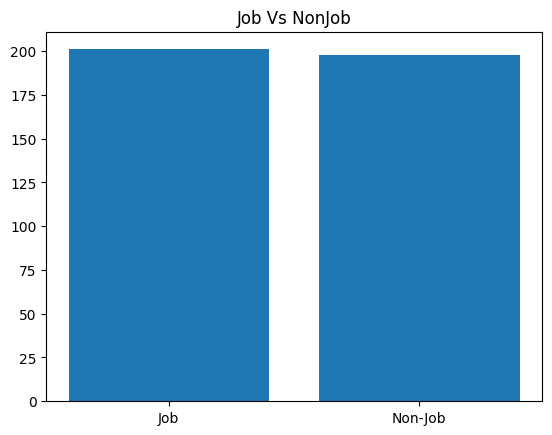

In [6]:
job_count, non_job_count = job_data["Job_Related"].value_counts()
plt.bar(x=["Job","Non-Job"], height=[job_count, non_job_count])
plt.title("Job Vs NonJob")

In [7]:
nlp = spacy.blank('en')

def spacy_tokenizer(doc):
  return [t.text for t in nlp(doc) if \
          not t.is_punct and \
          not t.is_space and t.is_alpha]

In [8]:
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
vectorized_data = vectorizer.fit_transform(job_data['Email'])

c:\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
vectorized_data[0].toarray()[0][100:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_data,
                                                    job_data['Job_Related'],
                                                    train_size=0.8,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((319, 5098), (80, 5098), (319,), (80,))

In [11]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [12]:
pred = naive_bayes.predict(X_test)

pred[0:100]

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No'],
      dtype='<U3')

In [13]:
print("Accuracy: ", accuracy_score(pred, y_test) * 100, "%")
print("Metrics: \n", classification_report(pred, y_test))

Accuracy:  87.5 %
Metrics: 
               precision    recall  f1-score   support

          No       0.71      1.00      0.83        24
         Yes       1.00      0.82      0.90        56

    accuracy                           0.88        80
   macro avg       0.85      0.91      0.86        80
weighted avg       0.91      0.88      0.88        80



In [14]:
confusion_matrix(pred, y_test)

array([[24,  0],
       [10, 46]], dtype=int64)

'Thank you for applying to the Junior Software Developer position at MSC Technology.\nUnfortunately, MSC Technology has moved to the next step in their hiring process, and your application was not selected at this time.'